The purpose of this project is to explore the relationship between the length of a video game and it's user rating. Data is from www.gamefaqs.com Game Rankings. Users on the website are able to report how long it took for them to finish a game (upto 80 hours), and also rate it out of 5. 

In [2]:
data = read.csv("C:\\Users\\Mohammed\\Downloads\\Game Rankings - GameFAQs.csv")
df0 = data.frame(data)
head(df0)

Rank,Title,Rating...5,Difficulty...5,Length..Hours.
1,Persona 5,4.54,3.06,80.00
2,The Witcher 3: Wild Hunt,4.46,3.37,80.00
3,Persona 5 Royal,4.45,2.86,80.00
4,Bloodborne,4.44,4.12,62.92
5,God of War,4.41,3.45,41.14
6,NieR: Automata,4.41,3.03,54.13


In [3]:
summary(df0) # NA's present
df = na.omit(df0) # Omit NA values

      Rank                                   Title       Rating...5   
 Min.   :  1.0   .hack//G.U. Last Recode        :  1   Min.   :2.230  
 1st Qu.:134.2   13 Sentinels: Aegis Rim        :  1   1st Qu.:3.600  
 Median :267.5   7 Days to Die                  :  1   Median :3.870  
 Mean   :267.5   A King's Tale: Final Fantasy XV:  1   Mean   :3.800  
 3rd Qu.:400.8   A Plague Tale: Innocence       :  1   3rd Qu.:4.058  
 Max.   :534.0   A Way Out                      :  1   Max.   :4.540  
 NA's   :1       (Other)                        :529   NA's   :1      
 Difficulty...5  Length..Hours. 
 Min.   :1.290   Min.   : 1.99  
 1st Qu.:2.862   1st Qu.:23.30  
 Median :3.025   Median :42.20  
 Mean   :3.054   Mean   :43.09  
 3rd Qu.:3.270   3rd Qu.:63.01  
 Max.   :4.510   Max.   :80.00  
 NA's   :1       NA's   :1      

Looking at a quick X-Y scatter plot of the data, it does not appear that there is any obvious correlation between the length and rating - the points seem randomly scattered. This is mostly confirmed by the regression output. The regression output returns an intercept of 3.56 and coefficient for X of 0.0055. The R^2 value is also very low, at 0.11. The slope is nearly 0 but proves to be statistically significant, with a p-value significantly lower than 0.05. From this, we can conclude that there is a very weak positive association between video game length and user score.


Call:
lm(formula = Y ~ X, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.67203 -0.19343  0.06094  0.24587  0.68849 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.5644483  0.0321979 110.704  < 2e-16 ***
X           0.0054555  0.0006603   8.262 1.15e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3481 on 532 degrees of freedom
Multiple R-squared:  0.1137,	Adjusted R-squared:  0.112 
F-statistic: 68.26 on 1 and 532 DF,  p-value: 1.148e-15


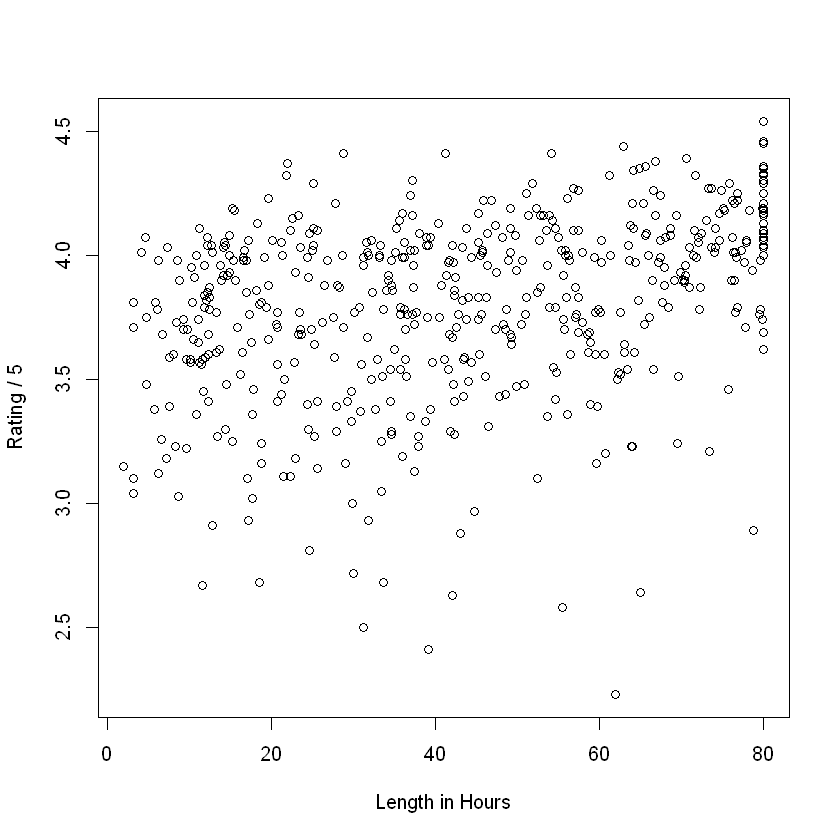

In [20]:
# Performing regression
X = df$Length..Hours.
Y = df$Rating...5
plot(X,Y, xlab = "Length in Hours", ylab = "Rating / 5")

model = lm(Y~X, data=df)
summary(model)

In [10]:
install.packages("rlang")
library(ggplot2)

package 'rlang' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mohammed\AppData\Local\Temp\RtmponVgv3\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

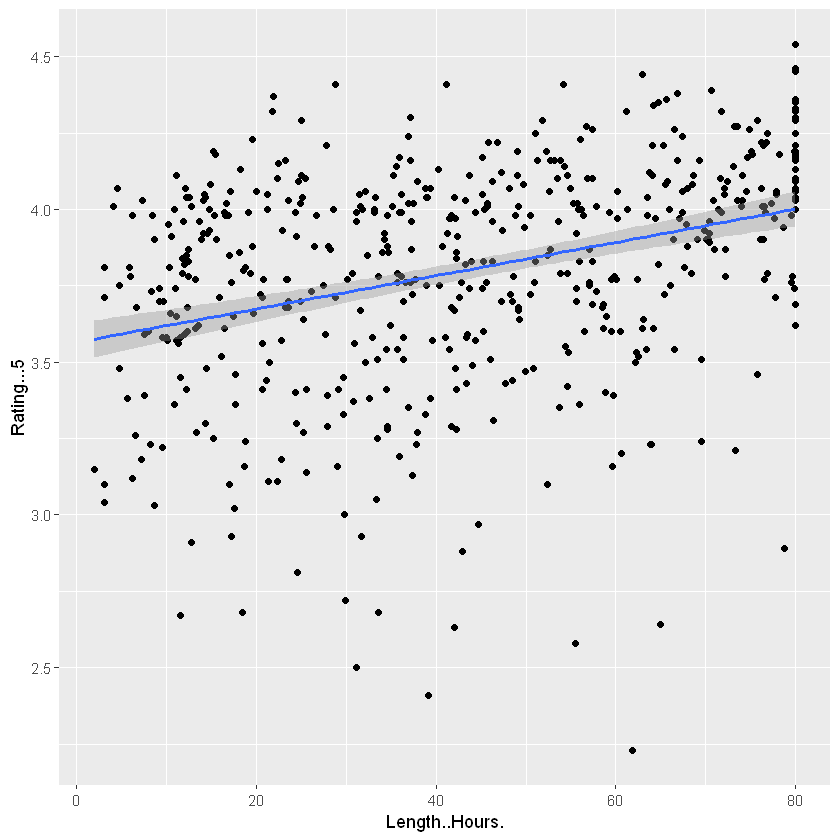

In [11]:
# Scatter plot with Regression Line
ggplot(df, aes(x=Length..Hours.,y=Rating...5)) + geom_point() + geom_smooth(method='lm', formula= y~x)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


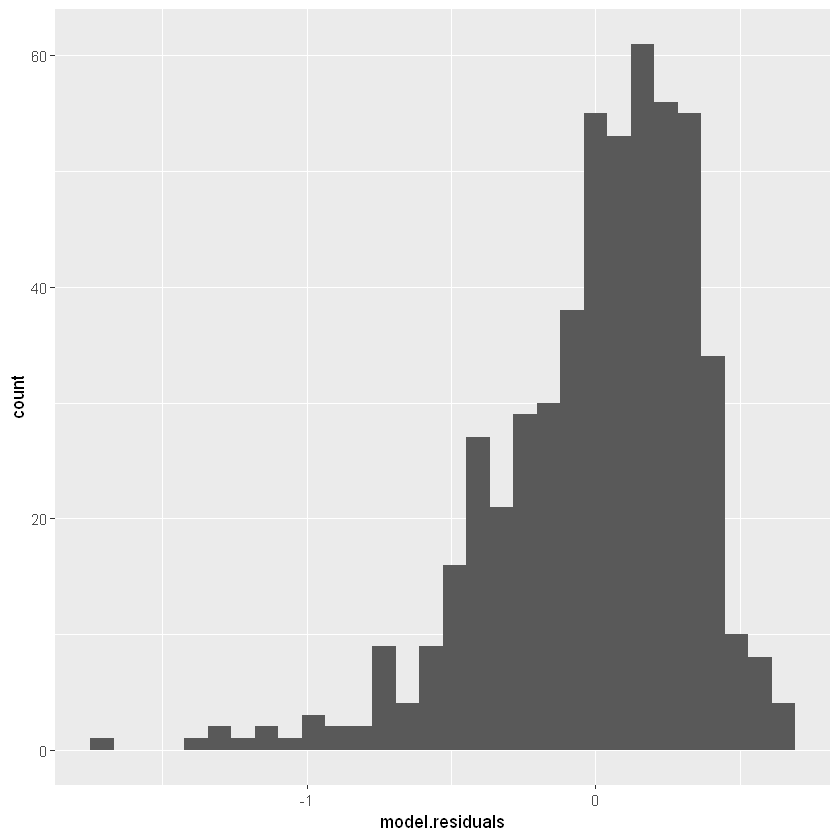

In [12]:
# Distribution of Residuals
ggplot(data = data.frame(model$residuals), aes(x=model.residuals)) + geom_histogram()

The residuals appear to be scattered around the mean of 0, with no obvious patterns, indicating that a linear model is a good fit for the data.

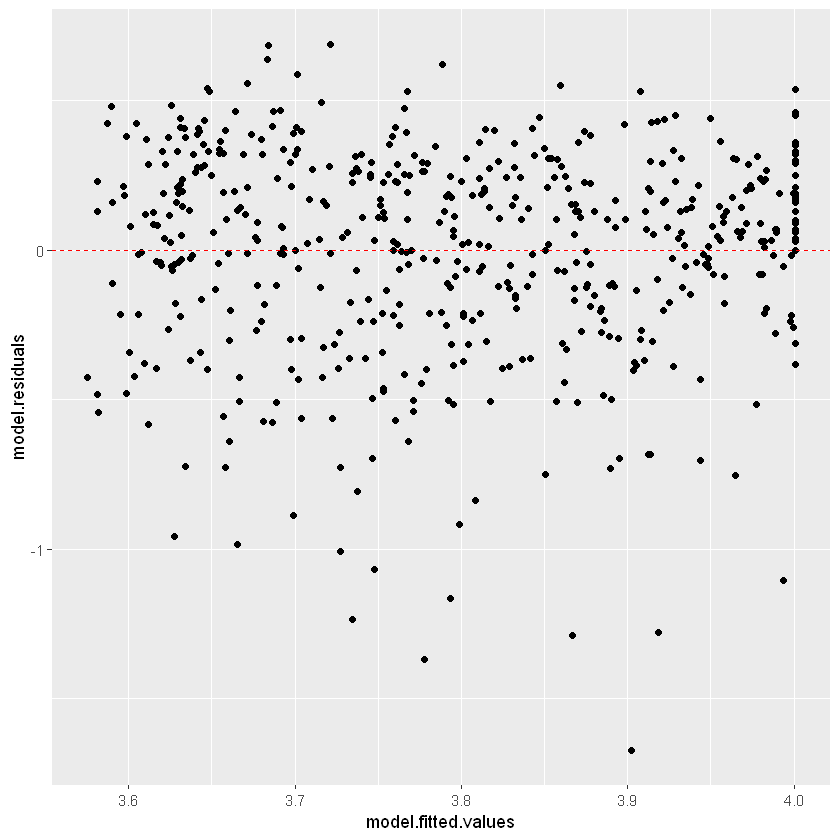

In [14]:
# Residual Plot
ggplot(data = data.frame(model$residuals, model$fitted.values), 
       aes(x=model.fitted.values, y=model.residuals)) + 
  geom_point() + geom_hline(yintercept = 0, linetype="dashed", color = "red")

In this section, we perform the same regression analysis after removing outliers.

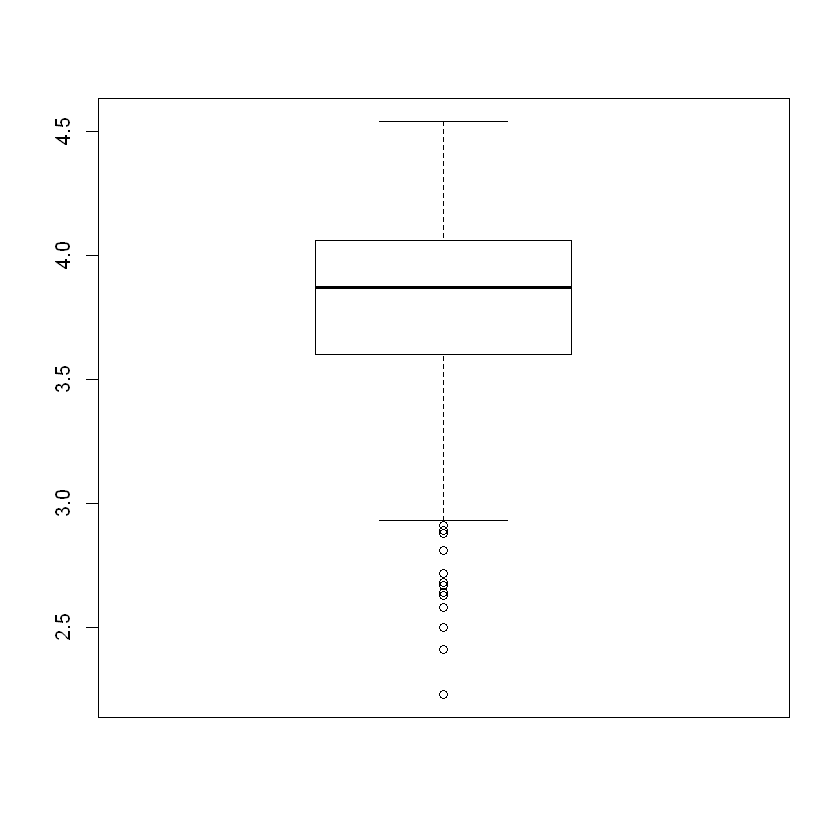

In [16]:
# Performing regression after removing outliers
out = boxplot(Y)$out

In [17]:
Xo = head(X,521)
Yo = head(Y,521)
dfout = data.frame(Xo,Yo)
model2 = lm(Yo~Xo, dfout)
summary(model2)


Call:
lm(formula = Yo ~ Xo, data = dfout)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.86729 -0.19278  0.04237  0.22154  0.65973 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.5934110  0.0279088 128.756   <2e-16 ***
Xo          0.0054485  0.0005714   9.536   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2987 on 519 degrees of freedom
Multiple R-squared:  0.1491,	Adjusted R-squared:  0.1475 
F-statistic: 90.94 on 1 and 519 DF,  p-value: < 2.2e-16


Overall, it does not appear that the removal of outliers had any significant effect on the regression model.

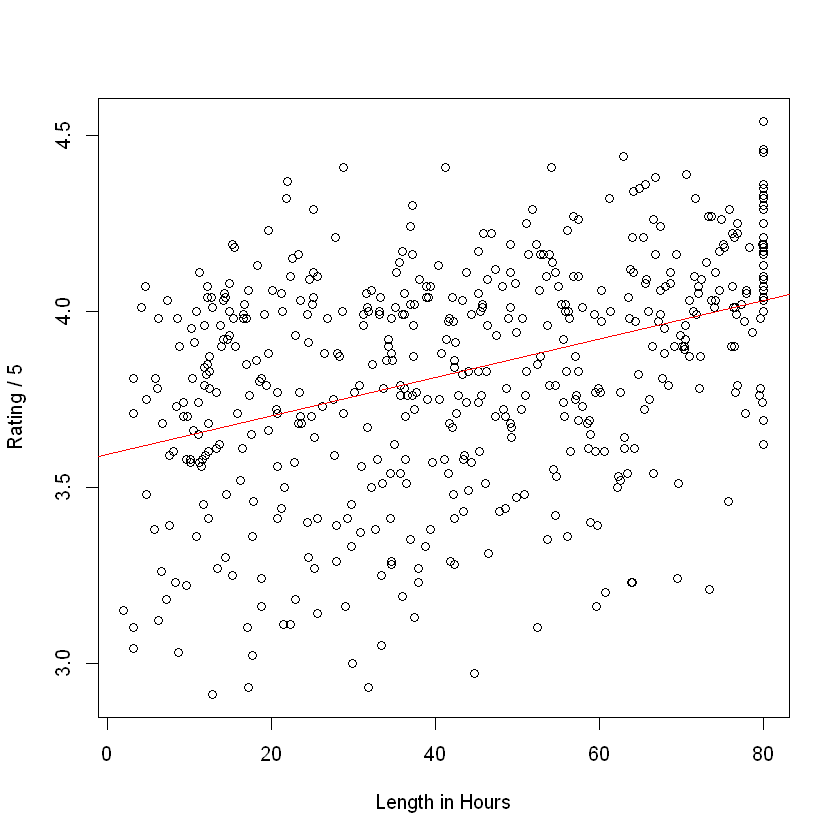

In [18]:
plot(Xo,Yo, xlab = "Length in Hours", ylab = "Rating / 5")
abline(model2$coefficients, col='red')